# Analysis of Netflix Originals Films & IMDB Scores

## Data Exploration and Visualization

#### DATA 601: Fall 2021 

** **

##### Bailey Diao (UCID: 30032193)
##### Romi Punian (UCID: 30004170)
##### Charles Roberts (UCID: 30148925)
##### Saurabh Anand (UCID: 30153971)

** **

# Introduction

Movie and online streaming consumption has increased considerably over the years with the age of pervasive digitization and widespread content production. The Internet Movie Database (IMDb) is a platform that provides an online database covering the entirety of world cinema. This website contains public data on films such as the title of the film, languages in which the film is available, the overall film duration, the genre of the film, the audience, the rating of critics, the duration of the film etc. We have focused our analysis on the  Netflix Originals movie dataset for this project and will explore this dataset through visualizations using python libraries such as numpy, matplotlib, Pandas etc. We have used the Netflix Original Films and IMDb Scores dataset from Kaggle. The dataset consists of all Netflix original films released up to till June 1st, 2021.


As Netflix continues to expand both in its user base internationally, as well in the offerings of new Netflix Originals content it would be helpful to visualize certain metrics related to Netflix Originals it has produced. The project aims to understand the trend between several metrics in the dataset like genre, run-time, language distribution, IMDb Scores etc. Our purpose is to visualize these trends to get actionable insights that will help Netflix streamline their content in accordance with changing user preferences. We’ve made sure to include all of our results in our findings so that we cover analysis free from any bias.



# Guiding Questions

We came up with the following guiding questions which will help us to better understand the data on Netflix Originals:
##### Q1: What is the Netflix Originals language distribution? 
##### Q2: What is the average run time of each Genre? What is the shortest and longest Genre on average?
##### Q3: How many Netflix Originals were created per genre?
##### Q4: Is there a correlation between Genre and IMDb Score?
##### Q5: What is the most popular IMDb score and how many Netflix Originals are rated with that score?
We decided on these questions as we pondered what kind of data would be useful for Netflix as a company to understand the tastes of their user base, as well as data about the movies that the company produces and how this can be leveraged for future content creation for Netflix.



# Dataset



- ##### "Netflix Originals Films & IMDB Scores" (Source: Kaggle; Data scraped from Wikipedia and IMDb).
- ##### This data is licensed under the CC0 1.0 Universal (CC0 1.0) Public Domain Dedication with no copyright.
- ##### Features data on movie genre, runtime, IMDb score and language for all Netflix original films released as of June 1, 2021. 
- ##### Structured, tabular form: 584 rows of 6 columns.
- ##### 22 languages, 35 movie genres.  
- ##### Runtime in minutes; IMDb scores rated on scale 1-10.

The Netflix Originals Films & IMDB Scores dataset was obtained through Kaggle provided by Data Analyst Luis Corter in CSV format and the downloaded CSV file was read through pandas. Prior to use, the dataset columns must be transferred into pandas data frames that can be utilized for counts, visualizations, etc; this includes excluding unnecessary columns, dropping unusable entries and elements.

# Data Wrangling

## Movie Language Distribution Wrangling

Before we got started, we made the decision to filter out any languages with multiple elements such as “English/Japanese”. In this case, any languages with multiple values were filtered out for ease of use. We created a data frame for each language by excluding all other columns, and renaming the language column according to the corresponding language. After we merged all individual language data frames into one data frame and we did a count for the number of movies in each language. The language to movie count was done by setting up a table with the languages as columns, compared the movies by row and then tallied up the counts for each column. The languages with low movie counts were added to the "Other’s" group in order to focus on the languages with larger representations.

## Movie Genre and and Runtime Wrangling

We created a data frame containing Genre and Runtime and filtered out any movie genre with multiple elements such as “Science Fiction/Drama”. We then did a count for each movie genre as well as calculating the average runtime for each genre category. The counts and runtime data frame's were then merged, column names were changed and the data was sorted in decreasing order. Any genres with 2 or less counts were dropped because 1 or 2 movies can not represent the average runtime of a genre. 

## IMDb Score Wrangling

We created a data frame containing Genre and IMDb scores and again filtered out any movie genre with multiple elements. Based on the IMDb score, we established the average rating for each movie genre by calculating the mean of the scores for each genre category; the IMDb scores were averaged to 2 decimal places. The average rating and genres were then merged into a data frame. In order to determine the most popular IMDb , we counted how many movies are associated with each score.

# Imports

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import plotly.express as px
import plotly.offline as py

# Data Reading 

In [2]:
# Read in CSV file
df = pd.read_csv("NetflixOriginals.csv",encoding='ISO-8859-1')

display(df)

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


# Guiding Question #1

### What is the Netflix Originals language distribution? 

The first question which is based on language could help Netflix in the business context to understand the distribution of the Netflix Originals they offer and which languages they produce the most. This could help Netflix understand if they are producing too much content for one language group and from there can decide if they would like to diversify the content they create in the future to target other language groups.


In [3]:
#creating a data frame for each language and rename the column
english = df.loc[df['Language'] == 'English']
english_df = english.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
english_df.rename(columns={'Language': 'English'}, inplace=True)

spanish = df.loc[df['Language'] == 'Spanish']
spanish_df = spanish.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
spanish_df.rename(columns={'Language': 'Spanish'}, inplace=True)

hindi = df.loc[df['Language'] == 'Hindi'] 
hindi_df = hindi.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
hindi_df.rename(columns={'Language': 'Hindi'}, inplace=True)

italian = df.loc[df['Language'] == 'Italian']
italian_df = italian.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
italian_df.rename(columns={'Language': 'Italian'}, inplace=True)

portuguese = df.loc[df['Language'] == 'Portuguese']
portuguese_df = portuguese.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
portuguese_df.rename(columns={'Language': 'Portuguese'}, inplace=True)

turkish = df.loc[df['Language'] == 'Turkish']
turkish_df = turkish.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
turkish_df.rename(columns={'Language': 'Turkish'}, inplace=True)

korean = df.loc[df['Language'] == 'Korean']
korean_df = korean.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
korean_df.rename(columns={'Language': 'Korean'}, inplace=True)

indonesian = df.loc[df['Language'] == 'Indonesian']
indonesian_df = indonesian.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
indonesian_df.rename(columns={'Language': 'Indonesian'}, inplace=True)

malay = df.loc[df['Language'] == 'Malay']
malay_df = malay.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
malay_df.rename(columns={'Language': 'Malay'}, inplace=True)

dutch = df.loc[df['Language'] == 'Dutch']
dutch_df = dutch.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
dutch_df.rename(columns={'Language': 'Dutch'}, inplace=True)

french = df.loc[df['Language'] == 'French']
french_df = french.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
french_df.rename(columns={'Language': 'French'}, inplace=True)

filipino = df.loc[df['Language'] == 'Filipino']
filipino_df = filipino.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
filipino_df.rename(columns={'Language': 'Filipino'}, inplace=True)

marathi = df.loc[df['Language'] == 'Marathi']
marathi_df = marathi.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
marathi_df.rename(columns={'Language': 'Marathi'}, inplace=True)

tamil = df.loc[df['Language'] == 'Tamil']
tamil_df = tamil.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
tamil_df.rename(columns={'Language': 'Tamil'}, inplace=True)

bengali = df.loc[df['Language'] == 'Bengali']
bengali_df = bengali.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
bengali_df.rename(columns={'Language': 'Bengali'}, inplace=True)

georgian = df.loc[df['Language'] == 'Georgian']
georgian_df = georgian.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
georgian_df.rename(columns={'Language': 'Georgian'}, inplace=True)

german = df.loc[df['Language'] == 'German']
german_df = german.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
german_df.rename(columns={'Language': 'German'}, inplace=True)

japanese = df.loc[df['Language'] == 'Japanese']
japanese_df = japanese.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
japanese_df.rename(columns={'Language': 'Japanese'}, inplace=True)

norwegian = df.loc[df['Language'] == 'Norwegian']
norwegian_df = norwegian.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
norwegian_df.rename(columns={'Language': 'Norwegian'}, inplace=True)

polish = df.loc[df['Language'] == 'Polish']
polish_df = polish.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
polish_df.rename(columns={'Language': 'Polish'}, inplace=True)

swedish = df.loc[df['Language'] == 'Swedish']
swedish_df = swedish.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
swedish_df.rename(columns={'Language': 'Swedish'}, inplace=True)

thai = df.loc[df['Language'] == 'Thai']
thai_df = thai.drop(['Title','Genre', 'Premiere', 'Runtime', 'IMDB Score'], axis=1)
thai_df.rename(columns={'Language': 'Thai'}, inplace=True)


# merge all language into 1 single data frame
language_df = pd.concat([english_df,spanish_df,hindi_df,italian_df,portuguese_df,korean_df,indonesian_df,malay_df,dutch_df,polish_df,
                         french_df,filipino_df,marathi_df,tamil_df,bengali_df,georgian_df,german_df,japanese_df,norwegian_df,swedish_df,thai_df,turkish_df], axis=1)
display(language_df)              

,English,Spanish,Hindi,Italian,Portuguese,Korean,Indonesian,Malay,Dutch,Polish,...,Marathi,Tamil,Bengali,Georgian,German,Japanese,Norwegian,Swedish,Thai,Turkish
1,NaN,Spanish,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Italian,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,Hindi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,Hindi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
579,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581,English,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
582,NaN,NaN,NaN,NaN,Portuguese,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# count number of movies in each language
eng = language_df["English"].value_counts()
span = language_df["Spanish"].value_counts()
hin = language_df["Hindi"].value_counts()
ita = language_df["Italian"].value_counts()
por = language_df["Portuguese"].value_counts()
ind = language_df["Indonesian"].value_counts()
mal = language_df["Malay"].value_counts()
dut = language_df["Dutch"].value_counts()
fre = language_df["French"].value_counts()
fil = language_df["Filipino"].value_counts()
kor = language_df["Korean"].value_counts()
tur = language_df["Turkish"].value_counts()

mar = language_df["Marathi"].value_counts()
tam = language_df["Tamil"].value_counts()
ben = language_df["Bengali"].value_counts()
geo = language_df["Georgian"].value_counts()
ger = language_df["German"].value_counts()

jap = language_df["Japanese"].value_counts()
nor = language_df["Norwegian"].value_counts()
pol = language_df["Polish"].value_counts()
swe = language_df["Swedish"].value_counts()
tha = language_df["Thai"].value_counts()


display(eng,span,hin,ita,por,ind,mal,dut,fre,fil,kor,tur,mar,tam,ben,geo,ger,jap,nor,pol,swe,tha) 

English    401
Name: English, dtype: int64

Spanish    31
Name: Spanish, dtype: int64

Hindi    33
Name: Hindi, dtype: int64

Italian    14
Name: Italian, dtype: int64

Portuguese    12
Name: Portuguese, dtype: int64

Indonesian    9
Name: Indonesian, dtype: int64

Malay    1
Name: Malay, dtype: int64

Dutch    3
Name: Dutch, dtype: int64

French    20
Name: French, dtype: int64

Filipino    2
Name: Filipino, dtype: int64

Korean    6
Name: Korean, dtype: int64

Turkish    5
Name: Turkish, dtype: int64

Marathi    3
Name: Marathi, dtype: int64

Tamil    1
Name: Tamil, dtype: int64

Bengali    1
Name: Bengali, dtype: int64

Georgian    1
Name: Georgian, dtype: int64

German    5
Name: German, dtype: int64

Japanese    6
Name: Japanese, dtype: int64

Norwegian    1
Name: Norwegian, dtype: int64

Polish    3
Name: Polish, dtype: int64

Swedish    1
Name: Swedish, dtype: int64

Thai    2
Name: Thai, dtype: int64

### Plot with "Other's" column

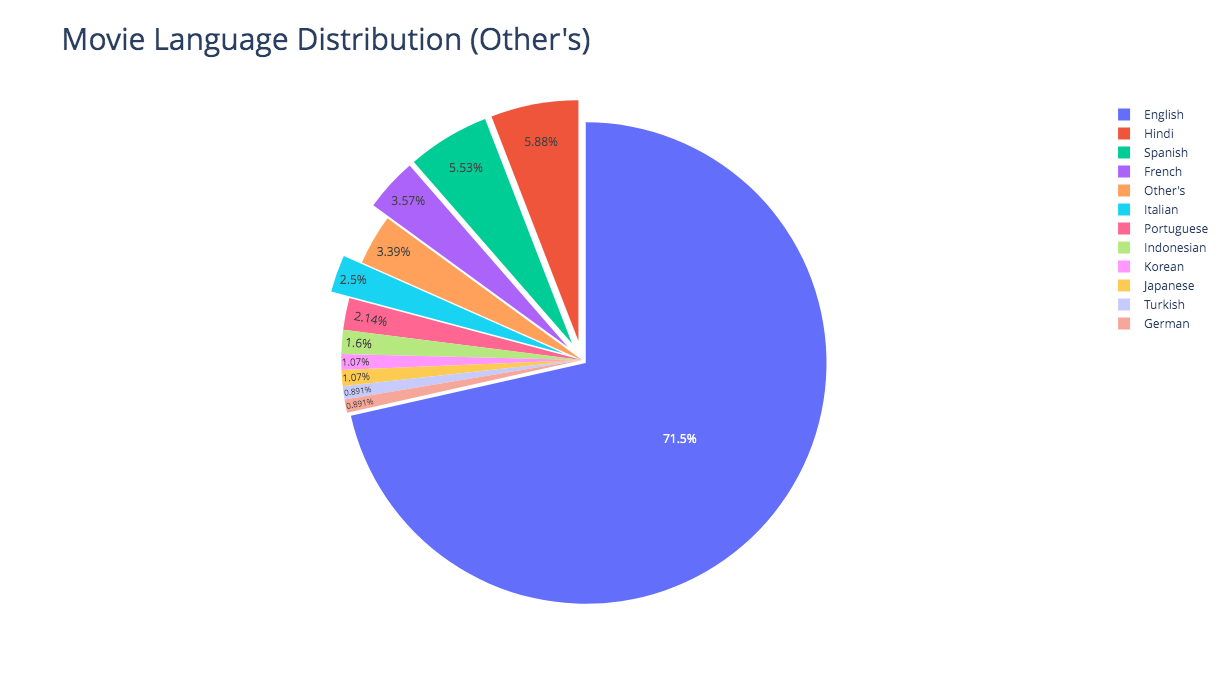

In [16]:
#summarize the count and language for ploting with "others" group
count = [401,31,33,14,12,9,20,6,5,6,5,19]
languages = ["English","Spanish","Hindi","Italian","Portuguese","Indonesian","French","Korean","Turkish","Japanese","German", "Other's"]


# plot the pie chart with "others" column
fig = px.pie(df, values=count, names=languages, title = "Movie Language Distribution (Other's)", width=700, height=700)
fig.update_traces(textposition = 'inside', textinfo="percent", pull=[0.02,0.08,0.08,0.08,0,0, 0.08,])
fig.update_layout(title_font_size = 30)
py.iplot(fig)

### Plot with all laguages

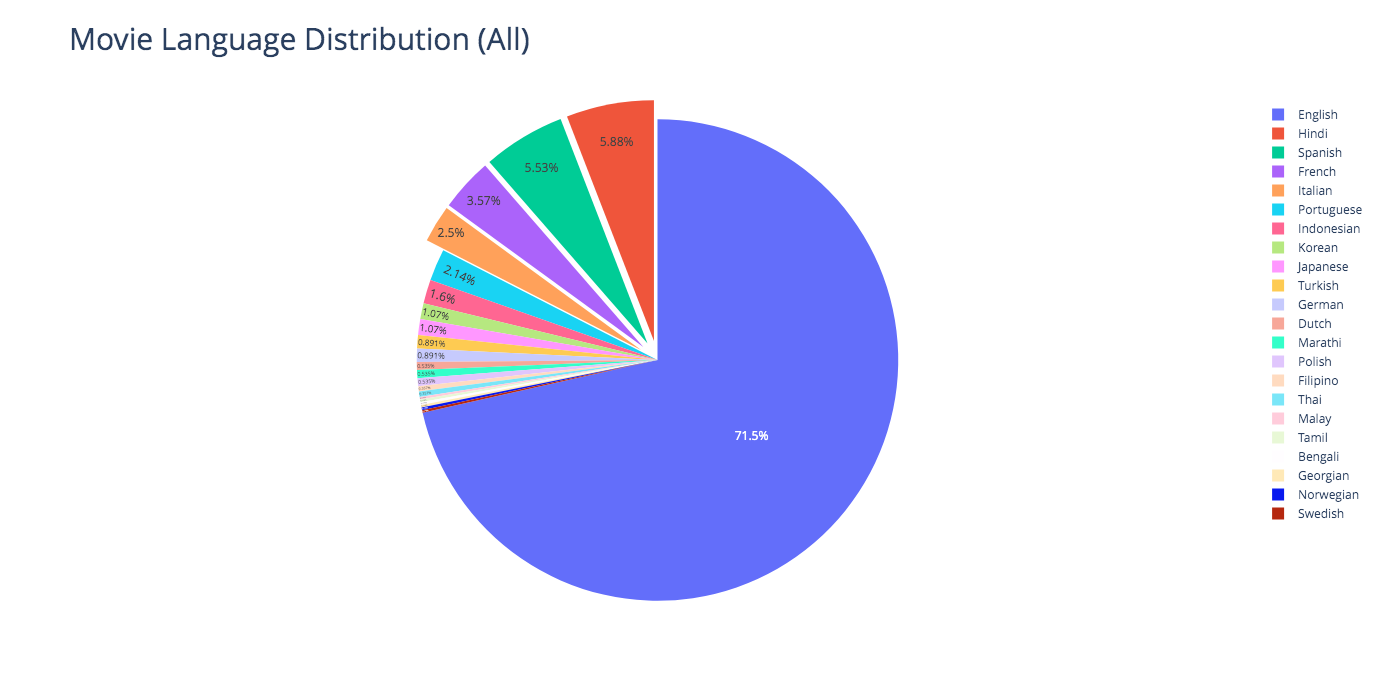

In [6]:
# summerize the count and language for ploting
count_all = [401,31,33,14,12,9,1,3,20,2,6,5,3,1,1,1,5,6,1,3,1,2]
languages_all = ["English","Spanish","Hindi","Italian","Portuguese","Indonesian","Malay","Dutch","French","Filipino","Korean","Turkish",
                "Marathi", "Tamil", "Bengali", "Georgian", "German", "Japanese", "Norwegian","Polish", "Swedish", "Thai"]

# plot the pie chart with all laguages
fig = px.pie(df, values=count_all, names=languages_all, title = "Movie Language Distribution (All)", width=700, height=700)
fig.update_traces(textposition = 'inside', textinfo="percent", pull=[0.0,0.08,0.08,0.08,0,0,0,0, 0.08, 0])
fig.update_layout(title_font_size = 30)
py.iplot(fig)

### Results and Insights for Question 1

The first question which is based on language could help Netflix in the business context to understand the distribution of the Netflix Originals they offer and which languages they produce the most. This could help Netflix understand if they are producing too much content for one language group and from there can decide if they would like to diversify the content they create in the future to target other language groups.

We found that English made up the overwhelming majority of Netflix Originals content that was created, 71.5% of Netflix originals were made in english. This is not surprising as Netflix is a company based out of America and its initial user base was largely english speaking. However as Netflix expands and its user base becomes increasingly globalized, it will need to start making more and more content for other language groups. We can already see the beginnings of this language diversification as the following three most common Netflix Originals languages are: 
- Hindi (5.88%)
- Spanish (5.53%)
- French (3.57%). 

This is a good start, however, going forwards Netflix will need to take advantage of its increasingly growing international user base. We recommend to Netflix that it should begin to offer more content in different languages, specifically targeting the most spoken languages in the world. That would mean more content for languages such as Mandarin, Hindi, Spanish, and French among others.

It was very surprising to find that Mandarin was not one of the top languages, in fact we found that it was actually not even represented in the data at all. While this may be due to Netflix not offering services in China, there is still a large Mandarin speaking diaspora outside of China who Netflix could capitalize on by offering them content in their language.

It is also interesting to note that Korean is not highly represented in the language distribution of Netflix originals, it is actually one of the lowest at 1.07% however recently Squid Game, a Korean Netflix Originals (released after June 1st, so it is not represented in the data) was met with resounding success, to capitalize on the success and new found interest in Korean content, we would expect that Netflix will put out more Korean content in the coming years.


# Guiding Question #2

### What is the average run time of each Genre? What is the shortest and longest Genre run time on average?

The second guiding question we are looking into is related to genres and run time, we are looking at the average run time for each genre, and which genres are longest and shortest. This information can be used to provide Netflix with a baseline for the length of the content they create per genre for the future. 




In [7]:
# create a new data frame only containing Genre and Runtime
df_genre = df[["Genre", "Runtime"]]

# filter out all genre types
genre_type = df_genre.loc[(df['Genre'] == "Documentary")|(df['Genre'] == "Thriller")|(df['Genre'] == "Horror thriller")|(df['Genre'] == "Mystery")
| (df['Genre'] == "Action")|(df['Genre'] == "Comedy")|(df['Genre'] == "Drama")|(df['Genre'] == "Romantic comedy")|(df['Genre'] == "Action comedy")
|(df['Genre'] == "Horror anthology") | (df['Genre'] == "Political thriller")|(df['Genre'] == "Superhero-Comedy")|(df['Genre'] == "Romance drama")
|(df['Genre'] == "Horror")|(df['Genre'] == "Heist")|(df['Genre'] == "Superhero")|(df['Genre'] == "Western")|(df['Genre'] == "Animation")
|(df['Genre'] == "Christmas musical")|(df['Genre'] == "Concert Film")|(df['Genre'] == "War")|(df['Genre'] == "Family")|(df['Genre'] == "Science fiction")
|(df['Genre'] == "Musical")|(df['Genre'] == "Biopic")|(df['Genre'] == "Satire")|(df['Genre'] == "One-man show")|(df['Genre'] == "Fantasy")
|(df['Genre'] == "Mockumentary")|(df['Genre'] == "Sports film")|(df['Genre'] == "Stop Motion")|(df['Genre'] == "Adventure")|(df['Genre'] == "Historical-epic")
|(df['Genre'] == "Mentalism special")|(df['Genre'] == "Making-of")]

display(genre_type)

,Genre,Runtime
0,Documentary,58
1,Thriller,81
3,Horror thriller,94
4,Mystery,90
5,Action,147
...,...,...
579,Concert Film,125
580,Documentary,91
581,One-man show,153
582,Documentary,89


In [8]:
count = genre_type["Genre"].value_counts()

,Genre,Average Runtime,Counts for Genres
34,Western,116.666667,3
27,Science fiction,110.750000,4
0,Action,108.000000,7
4,Biopic,107.555556,9
9,Drama,107.311688,77
32,Thriller,105.121212,33
1,Action comedy,101.200000,5
25,Romantic comedy,100.692308,39
14,Horror,99.333333,9
16,Horror thriller,99.000000,3


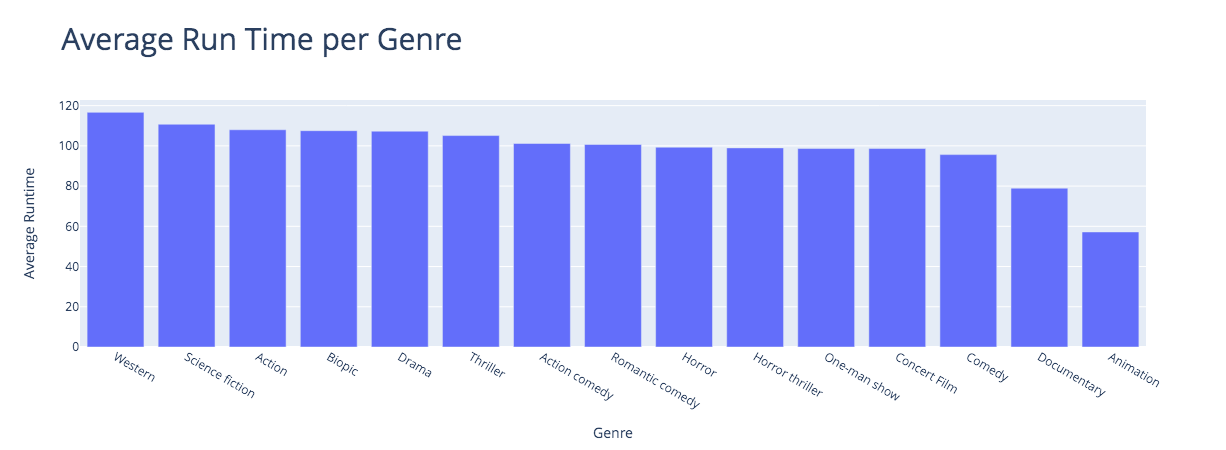

In [17]:
# finding the average runtime for each genre
avg_runtime = genre_type.groupby(by=["Genre"]).mean()
avg_runtime = avg_runtime.reset_index()

count = genre_type["Genre"].value_counts().to_frame()

df_value_counts = pd.DataFrame(count)
df_value_counts = df_value_counts.reset_index()
df_value_counts.columns = ['Genre', 'Counts for Genres'] # change column names

df_plot = pd.DataFrame({'Average Runtime':avg_runtime ['Runtime'], 'Genre':avg_runtime ['Genre']})

df_plot = pd.merge(df_plot,df_value_counts, on='Genre', how='inner').sort_values(by='Average Runtime')

df_plot = pd.DataFrame({'Genre':df_plot ['Genre'],'Average Runtime':df_plot ['Average Runtime'],  'Counts for Genres': df_plot['Counts for Genres']})

df_plot = df_plot.sort_values(['Average Runtime'], ascending = False)

df_plot = df_plot[(df_plot['Counts for Genres'] > 2 )]

display(df_plot)

fig = px.bar(df_plot, x='Genre', y='Average Runtime', title = "Average Run Time per Genre")
fig.update_layout(title_font_size = 30)
fig.show()

### Results and Insights for Question 2

We found that the 3 longest genre run times in descending order were: 
1. Westerns (116.67 mins)
2. Science Fiction (110.75 mins)
3. Action (108 mins)

The 3 shortest genre run times in descending order were: 
1. Comedies (95.65 mins)
2. Documentaries (78.96 mins)
3. Animation (57.2 mins)

Our findings were surprising at first as we had thought Documentaries would be some of the longest types of Netflix Originals. But it actually makes sense that they are on the shorter end as Netflix users may get bored of watching a documentary if it was too long. It is not surprising that westerns are the longest films as westerns are usually very epic in their scope, and they tend to keep audiences engaged for longer. 

Overall we believe this data will help Netflix provide a baseline for future content creation when producing Netflix Originals. Netflix can measure if their film is longer than the average for that particular genre, and this can help them decide how to edit the lengths of their films if they are too short or too long. 


# Guiding Question #3
### How many Netflix Originals were created per Genre?
Question 3 shows us a breakdown of the frequency of Netflix Originals that Netflix creates per genre. This can help Netflix understand if they are producing an excessive amount of only a few types of genres in comparison to others, and if they should diversify the original content they provide. It can also show Netflix what content they have an opportunity to make more of if there is not too much original content for certain genres. 


,Genre,Counts for Genres
0,Documentary,159
1,Drama,77
2,Comedy,49
3,Romantic comedy,39
4,Thriller,33
5,Horror,9
6,Biopic,9
7,Action,7
8,Concert Film,6
9,Animation,5


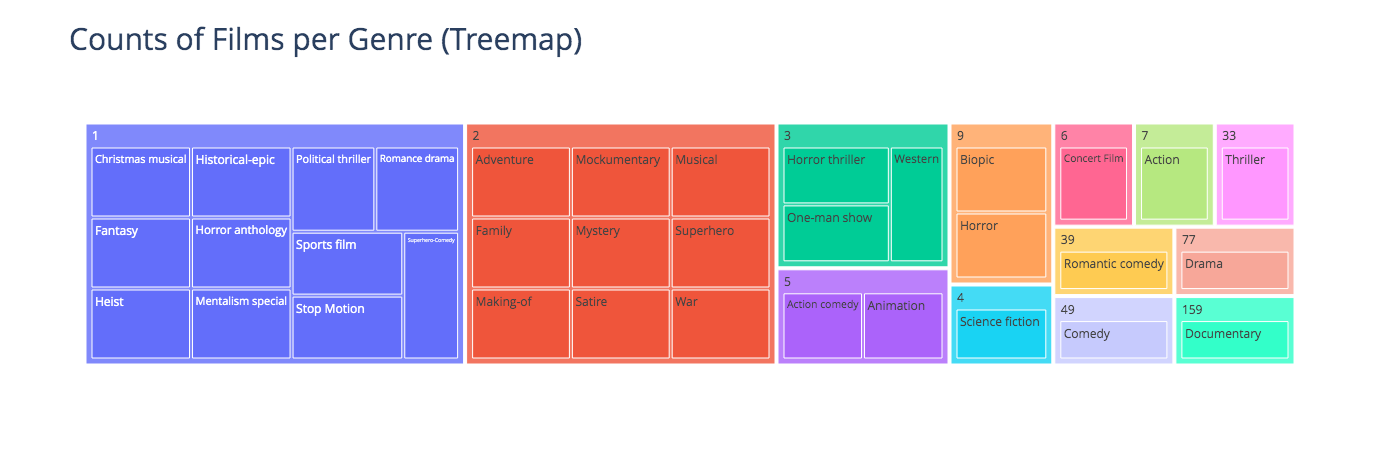

In [10]:
df_plot = df_value_counts.sort_values(['Counts for Genres'], ascending = False)
display(df_value_counts)

# plot the treemap for all genres
fig2 = px.treemap(df_plot, path=['Counts for Genres','Genre'], title = "Counts of Films per Genre (Treemap)")
fig2.update_layout(title_font_size = 30)
fig2.show()

### Results and Insights for Question 3

##### The top 3 most frequently produced Netflix Originals Genres are: 
1. Documentaries (159 films)
2. Dramas (77 films)
3. Comedies (49 films). 

##### There were also many genres in which only a single Netflix Originals was produced listed in our dataset; these were: 
- Romance Drama
- Fantasy
- Superhero Comedy
- Christmas Musical
- Mentalism Special
- Horror Anthology
- Historical-Epic
- Sports Film
- Stop Motion
- Heist
- Political Thriller

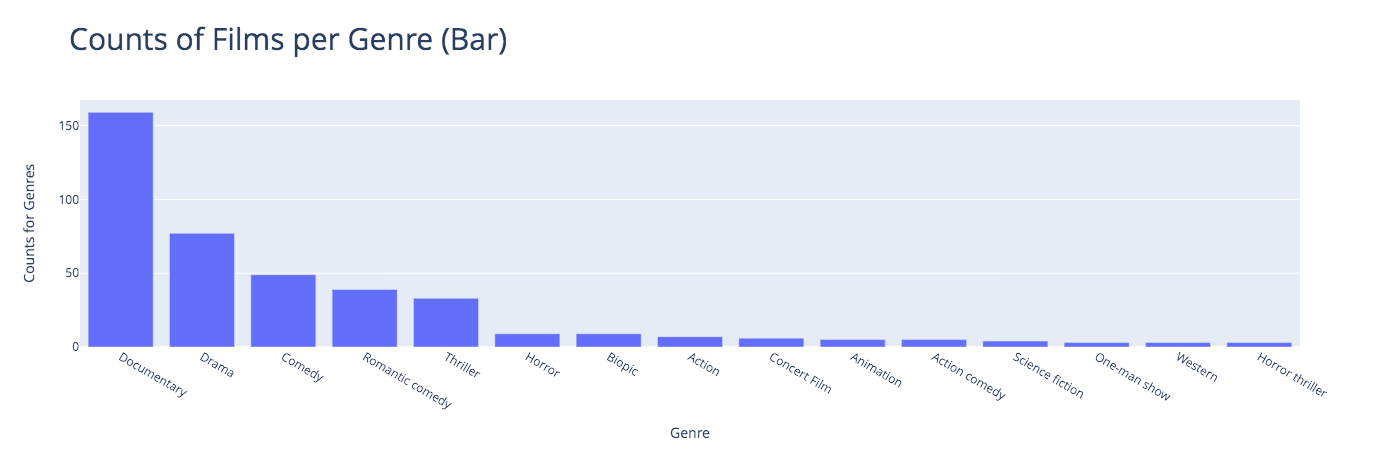

In [11]:
# plot the bar chart for all genres that contain more than 3 movies
df_value_counts = df_value_counts[(df_value_counts['Counts for Genres'] > 2 )]
fig = px.bar(df_value_counts, x='Genre', y='Counts for Genres', title = "Counts of Films per Genre (Bar)")
fig.update_layout(title_font_size = 30)
fig.show()

Clearly from this visualization we see that Documentaries are by far the most produced genre of Netflix Originals, almost double the second largest genre of Dramas. The question this brings up is, is it worth it for Netflix to produce this many documentaries? Do Netflix users actually like documentaries enough for it to be the most overwhelmingly produced genre offered? This will be answered in question 4 where we look at the average IMDb score for each genre. 

Because of the uneven frequency of content produced, it may be advisable for Netflix to diversify the content it is creating, too much of only a few Genres may create boredom in the Netflix user base when they are browsing for something new and interesting to watch. We would suggest that for the future Netflix should look into creating more content for genre’s it has produced less of.

# Guiding Question #4

### Is there a correlation between Genre and IMDb Score?
Question 4 which looks at the correlation between genre and rating is also important for Netflix to understand. This question can help Netflix to understand what genres happen to be best rated and not as well rated overall which gives Netflix feedback on the general consensus of its users of the quality of certain genres. This question in combination with question 3 can guide netflix into deciding what types of genres it should produce more of. For example if there is a genre Netflix produces less of but it is on average rated quite highly, it may be of interest for Netflix to provide its users with more content in that genre. 



,Genre,Average IMDB Score,Counts for Genres
7,Concert Film,7.63,6
17,Making-of,7.45,2
22,One-man show,7.13,3
18,Mentalism special,7.10,1
8,Documentary,6.94,159
13,Historical-epic,6.90,1
33,War,6.75,2
3,Animation,6.56,5
4,Biopic,6.40,9
9,Drama,6.34,77


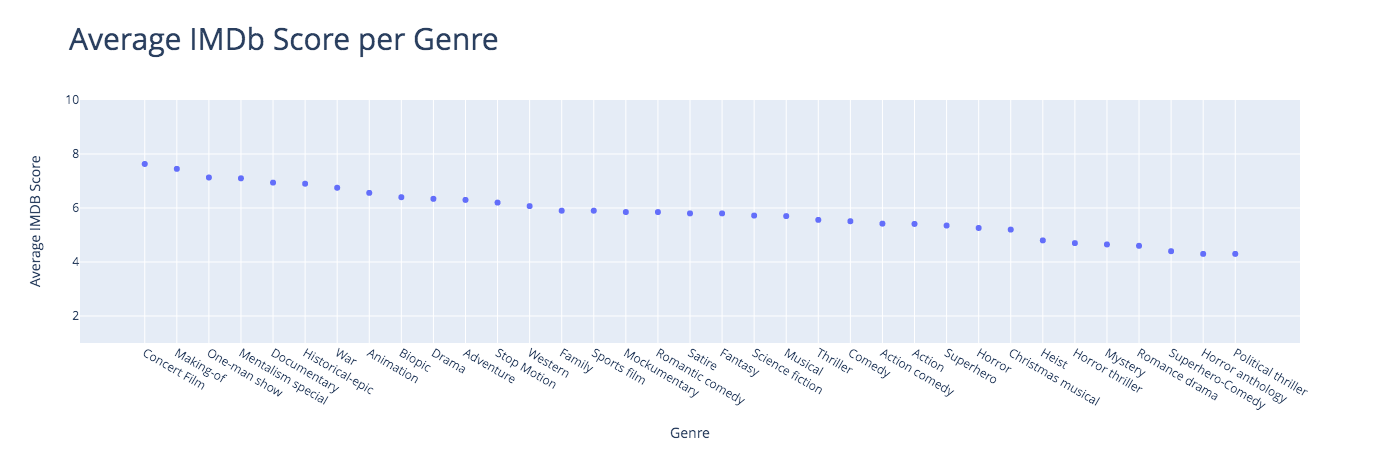

In [12]:
df_genreRating = df[["Genre", 'IMDB Score']]

# filter out all genre types
genre_typeRating = df_genreRating.loc[(df['Genre'] == "Documentary")|(df['Genre'] == "Thriller")|(df['Genre'] == "Horror thriller")|(df['Genre'] == "Mystery")
| (df['Genre'] == "Action")|(df['Genre'] == "Comedy")|(df['Genre'] == "Drama")|(df['Genre'] == "Romantic comedy")|(df['Genre'] == "Action comedy")
|(df['Genre'] == "Horror anthology") | (df['Genre'] == "Political thriller")|(df['Genre'] == "Superhero-Comedy")|(df['Genre'] == "Romance drama")
|(df['Genre'] == "Horror")|(df['Genre'] == "Heist")|(df['Genre'] == "Superhero")|(df['Genre'] == "Western")|(df['Genre'] == "Animation")
|(df['Genre'] == "Christmas musical")|(df['Genre'] == "Concert Film")|(df['Genre'] == "War")|(df['Genre'] == "Family")|(df['Genre'] == "Science fiction")
|(df['Genre'] == "Musical")|(df['Genre'] == "Biopic")|(df['Genre'] == "Satire")|(df['Genre'] == "One-man show")|(df['Genre'] == "Fantasy")
|(df['Genre'] == "Mockumentary")|(df['Genre'] == "Sports film")|(df['Genre'] == "Stop Motion")|(df['Genre'] == "Adventure")|(df['Genre'] == "Historical-epic")
|(df['Genre'] == "Mentalism special")|(df['Genre'] == "Making-of")]

avg_Rating = genre_typeRating.groupby(by=['Genre']).mean()
avg_Rating = avg_Rating.reset_index()

countGenreRating = genre_typeRating["Genre"].value_counts().to_frame()

df_value_countsGenreRating = pd.DataFrame(countGenreRating)
df_value_countsGenreRating = df_value_countsGenreRating.reset_index()
df_value_countsGenreRating.columns = ['Genre', 'Counts for Genres'] # change column names

df_plotRating = pd.DataFrame({'Average IMDB Score':avg_Rating ['IMDB Score'], 'Genre':avg_Rating ['Genre']})

df_plotRating = pd.merge(df_plotRating,df_value_countsGenreRating, on='Genre', how='inner').sort_values(by='Average IMDB Score')

df_plotRating = pd.DataFrame({'Genre':df_plotRating ['Genre'],'Average IMDB Score':df_plotRating ['Average IMDB Score'],  'Counts for Genres': df_plotRating['Counts for Genres']})

df_plotRating = df_plotRating.sort_values(['Average IMDB Score'], ascending = False)

df_plotRating= df_plotRating.round(2)

display(df_plotRating)

fig = px.scatter(df_plotRating, x='Genre', y='Average IMDB Score', title = "Average IMDb Score per Genre")
fig.update_yaxes(range=[1,10])
fig.update_layout(title_font_size = 30)
fig.show()

### Results and Insights for Question 4

##### The top 3 rated genres are: 
1. Concert Films (IMDb Score: 7.63)
2. Making-Of (IMDb Score: 7.45)
3. One-Man Show (IMDb Score: 7.13). 

##### The lowest rated genres are: 

1. Superhero Comedy (IMDb Score: 4.4)
2. Horror Anthology (IMDb Score: 4.3) 
3. Political Thriller (IMDb Score: 4.3)

One thing that should be taken into account is that for this visualization we included genres with low amounts of Netflix Originals made (1 and 2 films). The reason these films were included was because it may be useful to see if certain genres that have low counts but high scores would be of interest for Netflix to look into making more content for moving forwards. Also the opposite may be of interest to Netflix, there may be genres where lots of content was produced but are on average rated lower, in this case it could be in Netflix’s interests to look into diversify its content offerings into other genres that it maybe hasn’t produced as much content for, instead of continuing to produce content that is rated lower.

Of course with this it is also important to note that genres with only 1 or 2 films cannot represent a genre. It's not necessarily the case that Netflix should invest in making more content for a Genre like Mentalism Specials just because the single Netflix Original in that genre is rated highly. Therefore we would recommend more research be done into Genres that are rated highly on average, but have had low amounts of content produced to see if they are truly worth the investment for Netflix.

We also see that Documentaries are fairly highly rated on average (IMDb Score: 6.94) which could be a factor in why Netflix produces such a large amount of Documentary content. For a genre like this it would make sense for Netflix to keep generating content as it seems to be well liked by Netflix users.

Another insight about the ratings could be that for certain genres that are rated highly, it could be because the types of tastes of users who watch those genres are more willing to rate them higher even if they aren’t necessarily representative of the overall tastes of Netflix’s user base. For example Concert Films and Making-Of may have the highest scores because the users that are more likely to watch that type of content are predisposed to rating it highly and enjoying it in a way that is unrepresentative of the average Netflix user (this could be described as a niche segments of the user base).


# Guiding Question #5

### Q: What is the most popular IMDb score and how many Netflix Originals are rated with that score? 

Question 5 looks for the most frequent IMDb Netflix original scores, and then looks to see how many films have achieved this rating. This could provide Netflix with a baseline to compare both past and future content performance and ratings to see how successful the content is. If content is below the most frequent score it could be an indicator that the lower scored content is not as liked by netflix users, and netflix can use this information moving forward to provide users with content they prefer.

In [13]:
# create a new data frame only containing Title and IMDB Score
df_IMDBscore = df[["Title", "IMDB Score"]]
display(df_IMDBscore)


,Title,IMDB Score
0,Enter the Anime,2.5
1,Dark Forces,2.6
2,The App,2.6
3,The Open House,3.2
4,Kaali Khuhi,3.4
...,...,...
579,Taylor Swift: Reputation Stadium Tour,8.4
580,Winter on Fire: Ukraine's Fight for Freedom,8.4
581,Springsteen on Broadway,8.5
582,Emicida: AmarElo - It's All For Yesterday,8.6


In [14]:
#count number of movies associated with each score
grouped = df_IMDBscore["IMDB Score"].value_counts()
grouped = grouped.reset_index()
grouped.rename(columns={'index': 'IMDB Score','IMDB Score': 'Count'}, inplace=True)  
display(grouped)

,IMDB Score,Count
0,6.3,30
1,5.8,30
2,7.1,28
3,6.4,28
4,6.5,26
5,6.7,25
6,6.1,24
7,6.8,24
8,7.3,21
9,7.2,20


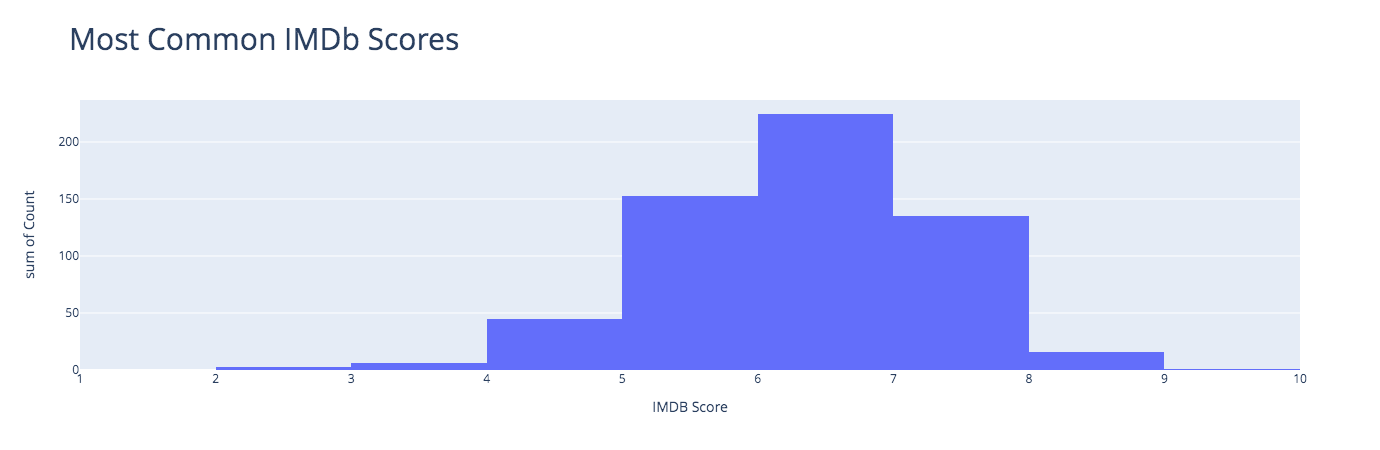

In [15]:
# convert IMDB score into a list
IMDBscore_list = grouped['IMDB Score'].tolist()
count_list = grouped['Count'].tolist()

#plot the histogram
fig = px.histogram(grouped, x="IMDB Score", y="Count", title= "Most Common IMDb Scores")
fig.update_layout(title_font_size = 30)
fig.update_xaxes(range=[1,10])
fig.show()

### Results and Insights for Question 5

We see from our histogram that IMDb scores in the range from 6-6.9 are the most popular, followed by  5-5.9, and 7-7.9. This is important for Netflix as it can provide some targets for the scores of future content. It can also help them understand where they need to improve, and where they are doing well. Specifically we found that the most common 3 scores are: 6.3 (30 counts), 5.8 (30 counts) and 7.1 (28 counts).

This visualization can also work in combination with question 4, Netflix can look at genres where they produce lots of content that are on average scored below the 6-6.9 range and from there decide if they want to work on producing content for genres scored lower on average. Some potential genres that Netflix may want to look into improving content for are: Comedy, Thrillers, Heist, Horror Thrillers, Superhero, Romance Drama, and Horror.


# Conclusion

The analysis of  Netflix Originals dataset resulted in insightful findings. We found that English had the highest proportion in the language distribution which was expected but percentage distribution for Hindi (6.27%), Spanish (5.89%), and French (3.8%) gives us an interesting insight of how Netflix has diversified its content in tandem with regional requirements as it expands across markets worldwide. Netflix's original subscriber base was initially confined to the United States. A large part of their success was due to their decision to expand to international markets and the varying percentages of language distribution we obtained in our analysis testifies for this claim.

We further delved deep into the key metrics of our analysis which are genre, run time and the IMDb scores. We found the average run time for each genre and number of originals Netflix creates for each genre and we mapped the genres to a performance metric i.e. the IMDb score to do a performance comparison of the genres we considered. We see that Documentaries is the most produced genre and this could be due to the fact that documentaries may carry a lower license fee from movie studios and would be a more economical source of content to invest in. We also calculated the most frequent IMDb scores  6.3 (30 counts), 5.8 (30 counts) and 7.1 (28 counts) to check how the Netflix Originals fare on popularity. Upon analysing which type of genre is liked by people by using the IMDb scores, Netflix could align their original film releases in accordance with the results and thus get more profits.

# Future Work

Our future work would entail exploring more original film segments based on the data wrangling and analysis techniques we did for this project. Netflix could attempt to get a competitive edge in the market given how dynamic this last year has been due to the pandemic. There has been a slowdown in new content creation due to the shutdown in production. However this year has also seen Netflix’s subscription numbers go up due to quarantine rules. We would like to extend our analysis to determine which content or genres would be ideal and profitable for Netflix in the post pandemic era. We plan on doing this as we proceed to learn further subjects under the Data Science realm.


# References


- ##### Stack Overflow. (n.d.). python - Pandas groupby month and year. [online] Available at: https://stackoverflow.com/questions/26646191/pandas-groupby-month-and-year
- ##### TutorialKart. (n.d.). How to set Width for Bars of Bar Plot in Matplotlib? [online] Available at: https://www.tutorialkart.com/matplotlib-tutorial/matplotlib-pyplot-bar-plot-width/
- ##### Re-thought. (2020). 8 Python Pandas Value_counts() tricks that make your work more efficient. [online] Available at: https://re-thought.com/pandas-value_counts/
- ##### Stack Overflow. (n.d.). python - Named colors in matplotlib. [online] Available at: https://stackoverflow.com/questions/22408237/named-colors-in-matplotlib
- ##### Pydata.org. (2019). pandas: powerful Python data analysis toolkit — pandas 0.25.3 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/index.html.